In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import *

# Чтобы графики были побольше
plt.rcParams["figure.figsize"] = (10, 6)

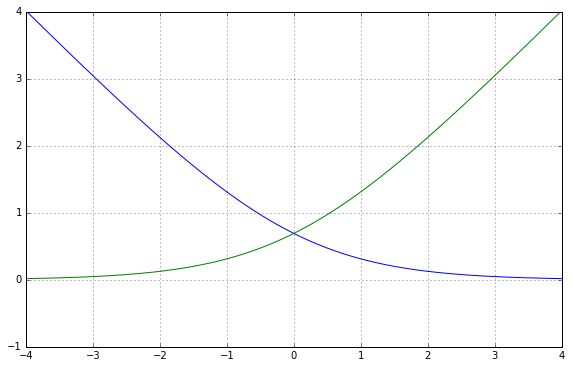

In [18]:
x = np.linspace(-4, 4, 200)

# синяя
logisticLossP = np.log(1 + np.exp(-x))
plt.plot(x, logisticLossP)

# зелёная
logisticLossN = np.log(1 + np.exp(x))
plt.plot(x, logisticLossN)

plt.xlim(x[0], x[-1])
plt.ylim(-1, 4)
plt.axes().set_aspect('equal')
plt.grid(True)
plt.show()

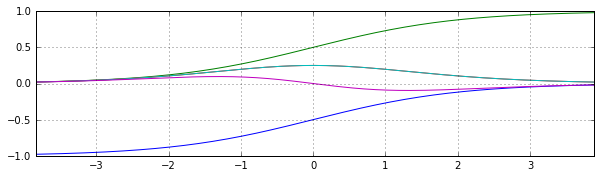

In [29]:
# Производные

dx = np.gradient(x)

logisticLossPD = np.gradient(logisticLossP, dx)
plt.plot(x, logisticLossPD)

logisticLossND = np.gradient(logisticLossN, dx)
plt.plot(x, logisticLossND)

logisticLossPDD = np.gradient(logisticLossPD, dx)
plt.plot(x, logisticLossPDD)

logisticLossNDD = np.gradient(logisticLossND, dx)
plt.plot(x, logisticLossNDD)

logisticLossDDD = np.gradient(logisticLossPDD, dx)
plt.plot(x, logisticLossDDD)

plt.xlim(x[4], x[-4])
plt.ylim(-1, 1)
plt.axes().set_aspect('equal')
plt.grid(True)
plt.show()

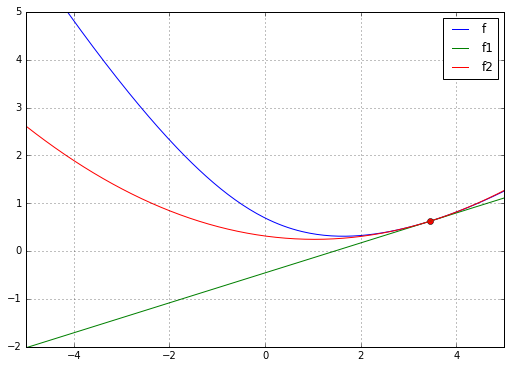

In [80]:
# Разложение функции в ряд тейлора

x = np.linspace(-5, 5, 200)
dx = np.gradient(x)

f = np.log(1 + np.exp(-x)) + x * x * 0.05
#f = np.sin(x)

fG1 = np.gradient(f, dx)
fG2 = np.gradient(fG1, dx)

def draw(index):
    plt.plot(x, f, label = "f")

    x0 = x[index]
    y0 = f[index]
    plt.plot([x0], [y0], "ro")

    f1 = y0 + ( x - x0 ) * fG1[index]
    plt.plot(x, f1, label = "f1")

    f2 = f1 + ( x - x0 ) ** 2 * fG2[index] / 2
    plt.plot(x, f2, label = "f2")

    plt.xlim(x[0], x[-1])
    plt.ylim(-2, 5)
    plt.axes().set_aspect('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

interact(draw, index=widgets.IntSlider( min = 0, max = x.size - 1, step = 1, value = x.size // 2 ))
